# Calculate median weekly trends in snowlines for all sites

In [1]:
import os
import glob
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import sys
from scipy.stats import iqr
from shapely import wkt
import seaborn as sns
import contextily as ctx
import numpy as np

In [2]:
base_path = '/Users/raineyaberle/Research/PhD/snow_cover_mapping/snow-cover-mapping-application/'
sys.path.append(os.path.join(base_path, 'functions'))
import model_analyze_utils as f

scm_path = '/Users/raineyaberle/Research/PhD/snow_cover_mapping/'

figures_out_path = os.path.join(base_path, 'figures')
# study_sites_path = '/Volumes/LaCie/raineyaberle/Research/PhD/snow_cover_mapping/study-sites/'
# site_names = sorted(os.listdir(study_sites_path))
# site_names = [x for x in site_names if (not x.startswith('.')) 
#               and (os.path.exists(os.path.join(study_sites_path, x, x + '_snowlines.csv')))]
# print('Number of sites with compiled snowlines files = ', len(site_names))
# site_names

In [3]:
# -----Load and compile AOIs
aois_path = os.path.join(scm_path, 'all_AOIs')
aois_fn = 'all_aois.shp'
# check if aois path exists
if not os.path.exists(aois_path):
    os.mkdir(aois_path)
# check if all aois shapefile exists
if not os.path.exists(os.path.join(aois_path, aois_fn)):
    # compile all RGI glacier boundaries
    aois = gpd.GeoDataFrame()
    for site_name in tqdm(site_names):
        aoi_path = os.path.join(study_sites_path, site_name, 'AOIs')
        aoi_fns = glob.glob(os.path.join(aoi_path, '*RGI*.shp'))
        if len(aoi_fns) > 0:
            aoi_fn = aoi_fns[0]
            aoi = gpd.read_file(aoi_fn)
            aoi = aoi.to_crs('EPSG:4326')
            aois = pd.concat([aois, aoi])
    aois.reset_index(drop=True, inplace=True)
    aois.to_file(os.path.join(aois_path, aois_fn), index=False)
    print('All glacier boundaries saved to file: ', os.path.join(aois_path, aois_fn))

else:
    # load from file if it already exists
    aois = gpd.read_file(os.path.join(aois_path, aois_fn))
    print('All glacier boundaries loaded from file.')

aois

All glacier boundaries loaded from file.


,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,Subregion,geometry
0,RGI60-01.00032,G213069E63641N,20090703,-9999999,-146.930984,63.640633,1,2,14.205,1411,...,11485,0,0,0,0,9,9,NaN,Alaska Range,"POLYGON ((-146.90152 63.66425, -146.90116 63.6..."
1,RGI60-01.00033,G213128E63680N,20090703,-9999999,-146.872000,63.680000,1,2,4.604,1109,...,7589,0,0,0,0,9,9,NaN,Alaska Range,"POLYGON ((-146.84326 63.67199, -146.84262 63.6..."
2,RGI60-01.00037,G213472E63469N,20090703,-9999999,-146.528168,63.469173,1,2,234.583,722,...,41911,0,0,0,0,3,9,Black Rapids Glacier,NaN,"POLYGON ((-146.40062 63.38060, -146.40321 63.3..."
3,RGI60-01.00038,G213531E63603N,20090703,-9999999,-146.469000,63.603000,1,2,138.555,851,...,29601,0,0,0,0,2,9,Trident Glacier,NaN,"POLYGON ((-146.30109 63.57925, -146.30059 63.5..."
4,RGI60-01.00046,G212723E63542N,20090703,-9999999,-147.277000,63.542000,1,2,193.423,844,...,42681,0,0,0,0,3,9,West Fork Glacier,NaN,"POLYGON ((-147.05197 63.62237, -147.05209 63.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,RGI60-02.17736,G238150E48784N,19759999,-9999999,-121.850350,48.784220,2,4,6.834,1217,...,4719,0,0,0,0,0,9,Coleman Glacier WA,NaN,"POLYGON ((-121.88439 48.78574, -121.88431 48.7..."
190,RGI60-02.17738,G238159E48761N,19759999,-9999999,-121.841480,48.760890,2,4,4.996,1192,...,5979,0,0,0,0,0,9,Deming Glacier WA,NaN,"POLYGON ((-121.82020 48.77586, -121.82017 48.7..."
191,RGI60-02.17739,G238170E48750N,19749999,-9999999,-121.829960,48.749560,2,4,2.888,1582,...,4307,0,0,0,0,0,1,Easton Glacier WA,NaN,"POLYGON ((-121.84130 48.75010, -121.84127 48.7..."
192,RGI60-02.17741,G238208E48771N,19759999,-9999999,-121.792480,48.770980,2,4,6.290,1412,...,4583,0,0,0,0,0,9,Boulder Glacier WA,NaN,"POLYGON ((-121.82016 48.77583, -121.82016 48.7..."


In [4]:
# -----Load and compile snowlines
snowlines_path = os.path.join(scm_path, 'all_snowlines')
snowlines_fn = 'all_snowlines.csv'
# check if snowlines path exists
if not os.path.exists(snowlines_path):
    os.mkdir(snowlines_path)
# check if all snowlines CSV exists
if not os.path.exists(os.path.join(snowlines_path, snowlines_fn)):
    # compile all RGI glacier boundaries
    snowlines = pd.DataFrame()
    for site_name in tqdm(site_names):
        snowline_path = os.path.join(study_sites_path, site_name)
        snowline_fns = glob.glob(os.path.join(snowline_path, '*_snowlines.csv'))
        if len(snowline_fns) > 0:
            snowline_fn = snowline_fns[0]
            snowline = pd.read_csv(snowline_fn)
            snowlines = pd.concat([snowlines, snowline])
    snowlines.reset_index(drop=True, inplace=True)
    snowlines.to_csv(os.path.join(snowlines_path, snowlines_fn), index=False)
    print('All snowlines saved to file: ', os.path.join(snowlines_path, snowlines_fn))

else:
    # load from file if it already exists
    snowlines = pd.read_csv(os.path.join(snowlines_path, snowlines_fn))
    print('All snowlines loaded from file.')

snowlines

All snowlines loaded from file.


/var/folders/9h/sg2rw9f10lq5jmfch9hnj6gc0000gq/T/ipykernel_29187/1866172516.py:24: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  snowlines = pd.read_csv(os.path.join(snowlines_path, snowlines_fn))


,site_name,datetime,snowlines_coords_X,snowlines_coords_Y,HorizontalCRS,VerticalCRS,snowline_elevs_m,snowline_elevs_median_m,SCA_m2,AAR,ELA_from_AAR_m,dataset,geometry,CRS,HorizontalReference,VerticalReference
0,RGI60-01.00032,2013-05-26T15:08:53,[],[],EPSG:32606,EGM96 geoid (EPSG:5773),1403.1963,1403.1963,10233000.0,0.970302,1447.7217,Landsat,[],NaN,NaN,NaN
1,RGI60-01.00032,2013-10-26T15:02:47,"[498135.0, 498120.0, 498105.0, 498075.0, 49804...","[7061070.0, 7061085.0, 7061100.0, 7061100.0, 7...",EPSG:32606,EGM96 geoid (EPSG:5773),"[1436.056635197854, 1436.056635197854, 1433.88...",1438.7190,10012500.0,0.974168,1438.1063,Landsat,"LINESTRING (498135 7061070, 498120 7061085, 49...",NaN,NaN,NaN
2,RGI60-01.00032,2014-06-07T15:00:43,"[499275.0, 499260.0, 499245.0, 499230.0, 49921...","[7060140.0, 7060155.0, 7060170.0, 7060155.0, 7...",EPSG:32606,EGM96 geoid (EPSG:5773),"[1565.076636493261, 1565.076636493261, 1561.70...",1541.0497,12474000.0,0.933774,1519.7489,Landsat,"LINESTRING (499275 7060140, 499260 7060155, 49...",NaN,NaN,NaN
3,RGI60-01.00032,2014-10-13T15:01:17,"[503535.0, 503505.0, 503475.0, 503445.0, 50343...","[7057650.0, 7057650.0, 7057650.0, 7057650.0, 7...",EPSG:32606,EGM96 geoid (EPSG:5773),"[2031.2784724049204, 2029.1873066596477, 2027....",2031.2784,8817300.0,0.979210,1427.6902,Landsat,"LINESTRING (503535 7057650, 503505 7057650, 50...",NaN,NaN,NaN
4,RGI60-01.00032,2015-10-23T15:25:39,[],[],EPSG:32606,EGM96 geoid (EPSG:5773),1402.4318,1402.4318,10414800.0,0.999693,1404.9034,Sentinel-2_TOA,[],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52350,RGI60-02.17741,2023-10-27T19:20:56,[],[],EPSG:32610,EGM96 geoid (EPSG:5773),1406.2806,1406.2806,5814500.0,0.989079,1484.3608,Sentinel-2_SR,[],NaN,NaN,NaN
52351,RGI60-02.17741,2023-10-27T19:20:56,[],[],EPSG:32610,EGM96 geoid (EPSG:5773),1406.2806,1406.2806,5675400.0,0.976228,1550.5474,Sentinel-2_TOA,[],NaN,NaN,NaN
52352,RGI60-02.17741,2023-10-27T19:20:56,[],[],EPSG:32610,EGM96 geoid (EPSG:5773),1406.2806,1406.2806,5675400.0,0.976228,1550.5474,Sentinel-2_TOA,[],NaN,NaN,NaN
52353,RGI60-02.17741,2023-10-29T19:10:56,[],[],EPSG:32610,EGM96 geoid (EPSG:5773),1406.2806,1406.2806,6038900.0,0.960446,1630.0000,Sentinel-2_SR,[],NaN,NaN,NaN


In [139]:
# -----Calculate weekly median trends for each site
snowlines_medians_fn = 'all_snowlines_weekly_median_trends.csv'
if not os.path.exists(os.path.join(snowlines_path, snowlines_medians_fn)):
    # add week-of-year (WOY column to snowlines
    snowlines['datetime'] = pd.to_datetime(snowlines['datetime'], format='mixed')
    snowlines['WOY'] = snowlines['datetime'].dt.isocalendar().week
    # determine columns to calculate weekly stats
    columns = ['AAR', 'snowline_elevs_median_m', 'SCA_m2', 'ELA_from_AAR_m']
    snowlines_medians = pd.DataFrame()
    for site_name in tqdm(snowlines['site_name'].drop_duplicates().values):
        # subset snowlines to site
        snowlines_site = snowlines.loc[snowlines['site_name']==site_name]
        # calculate weekly quartile trends
        q1 = snowlines_site[['WOY'] + columns].groupby(by='WOY').quantile(0.25)
        q1.columns = [x + '_P25' for x in q1.columns]
        q2 = snowlines_site[['WOY'] + columns].groupby(by='WOY').quantile(0.5)
        q2.columns = [x + '_P50' for x in q2.columns]
        q3 = snowlines_site[['WOY'] + columns].groupby(by='WOY').quantile(0.75)
        q3.columns = [x + '_P75' for x in q3.columns]
        qs = pd.merge(q1, pd.merge(q2, q3, on='WOY'), on='WOY')
        qs = qs.reindex(sorted(qs.columns), axis=1)
        qs['WOY'] = qs.index
        qs['site_name'] = site_name
        # concatenate to medians dataframe
        snowlines_medians = pd.concat([snowlines_medians, qs])
    # save to file
    snowlines_medians.to_csv(os.path.join(snowlines_path, snowlines_medians_fn), index=False)
    print('Median weekly snow trends saved to file: ', os.path.join(snowlines_path, snowlines_medians_fn))
        
else:
    snowlines_medians = pd.read_csv(os.path.join(snowlines_path, snowlines_medians_fn))
    print('Median weekly snow trends loaded from file.')
    
snowlines_medians
        

  0%|          | 0/180 [00:00<?, ?it/s]

Median weekly snow trends saved to file:  /Users/raineyaberle/Research/PhD/snow_cover_mapping/all_snowlines/all_snowlines_weekly_median_trends.csv


,AAR_P25,AAR_P50,AAR_P75,ELA_from_AAR_m_P25,ELA_from_AAR_m_P50,ELA_from_AAR_m_P75,SCA_m2_P25,SCA_m2_P50,SCA_m2_P75,snowline_elevs_median_m_P25,snowline_elevs_median_m_P50,snowline_elevs_median_m_P75,WOY,site_name
WOY,,,,,,,,,,,,,,
17,0.960559,0.987424,0.991828,1411.189450,1414.29630,1467.113000,13407550.0,13564400.0,13742750.0,1402.431800,1402.43180,1402.431800,17,RGI60-01.00032
18,0.948967,0.978006,0.996441,1407.899950,1429.58410,1490.872150,12004750.0,12527900.0,13220200.0,1402.431800,1402.43180,1402.814050,18,RGI60-01.00032
19,0.855447,0.911041,0.971798,1443.832775,1552.28490,1628.433475,10448150.0,12010500.0,12786050.0,1402.431800,1402.43180,1410.960950,19,RGI60-01.00032
20,0.882326,0.924096,0.961707,1465.554850,1534.14715,1591.236950,10939450.0,12702400.0,13200150.0,1402.431800,1402.81405,1405.452400,20,RGI60-01.00032
21,0.854095,0.943413,0.971476,1444.811200,1503.61800,1631.832300,10631400.0,12268300.0,12988975.0,1403.196300,1405.33490,1427.414150,21,RGI60-01.00032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,0.402120,0.464624,0.529366,2160.000000,2223.00000,2296.500000,2280300.0,2429100.0,3072800.0,2192.700050,2250.05050,2314.217500,37,RGI60-02.17741
39,0.846570,0.859479,0.872388,1817.000000,1833.00000,1849.000000,4534275.0,4613050.0,4691825.0,1961.587275,1965.75525,1969.923225,39,RGI60-02.17741
40,0.509487,0.563665,0.617843,2079.750000,2130.50000,2181.250000,3203450.0,3544100.0,3884750.0,1598.662100,1791.04360,1983.425100,40,RGI60-02.17741


In [192]:
# -----Compile RGI characteristics and minimum snow cover median statistics
min_snow_cover_stats_fn = 'min_snow_cover_stats.csv'
# check if exists in directory
if not os.path.exists(os.path.join(snowlines_path, min_snow_cover_stats_fn)):
    # initialize dataframe for RGI stats and minimum snow cover statts
    min_snow_cover_stats = pd.DataFrame()
    
    # iterate over site names in median snowlines dataframe
    for site_name in tqdm(sorted(snowlines_medians['site_name'].drop_duplicates().values)):
        # grab AOI for site
        aoi_site = aois.loc[aois['RGIId']==site_name, :]
        # grab median snowline stats for site
        snowlines_medians_site = snowlines_medians.loc[snowlines_medians['site_name']==site_name, :]
        # calculate min median stats
        median_columns = [x for x in snowlines_medians.columns if 'P50' in x]
        for column in median_columns:
            if (column=='ELA_from_AAR_m_P50') or (column=='snowline_elevs_median_m_P50'):
                aoi_site[column+'_max'] = snowlines_medians_site[column].max()
            else:
                aoi_site[column+'_min'] = snowlines_medians_site[column].min()
        # concatenate to full dataframe
        min_snow_cover_stats = pd.concat([min_snow_cover_stats, aoi_site])

    # add subregion names and colors
    min_snow_cover_stats[['Subregion', 'color']] = '', ''
    min_snow_cover_stats[['O1Region', 'O2Region']] = min_snow_cover_stats[['O1Region', 'O2Region']].astype(int)
    for o1, o2 in min_snow_cover_stats[['O1Region', 'O2Region']].drop_duplicates().values:
        min_snow_cover_stats.loc[(min_snow_cover_stats['O1Region']==o1) 
                                 & (min_snow_cover_stats['O2Region']==o2), ['Subregion', 'color']] = f.determine_subregion_name_color(o1, o2)
    # save to file
    min_snow_cover_stats.to_csv(os.path.join(snowlines_path, min_snow_cover_stats_fn), index=False)
    print('Minimum median snow cover stats saved to file: ', os.path.join(snowlines_path, min_snow_cover_stats_fn))
        
else:
    # load from file
    min_snow_cover_stats = pd.read_csv(os.path.join(snowlines_path, min_snow_cover_stats_fn))
    print('Minimum median snow cover stats loaded from file.')

# reformat as GeoDataFrame
min_snow_cover_stats['geometry'] = min_snow_cover_stats['geometry'].apply(wkt.loads)
min_snow_cover_stats = gpd.GeoDataFrame(min_snow_cover_stats, crs='EPSG:4326')
min_snow_cover_stats

Minimum median snow cover stats loaded from file.


,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Surging,Linkages,Name,Subregion,geometry,AAR_P50_min,ELA_from_AAR_m_P50_max,SCA_m2_P50_min,snowline_elevs_median_m_P50_max,color
0,RGI60-01.00032,G213069E63641N,20090703,-9999999,-146.930984,63.640633,1,2,14.205,1411,...,9,9,NaN,Alaska Range,"POLYGON ((-146.90152 63.66425, -146.90116 63.6...",0.140864,2632.17495,1793450.0,2444.11650,#1f78b4
1,RGI60-01.00033,G213128E63680N,20090703,-9999999,-146.872000,63.680000,1,2,4.604,1109,...,9,9,NaN,Alaska Range,"POLYGON ((-146.84326 63.67199, -146.84262 63.6...",0.011958,2956.57200,54800.0,2998.45630,#1f78b4
2,RGI60-01.00037,G213472E63469N,20090703,-9999999,-146.528168,63.469173,1,2,234.583,722,...,3,9,Black Rapids Glacier,Alaska Range,"POLYGON ((-146.40062 63.38060, -146.40321 63.3...",0.357395,1918.16000,74287800.0,1941.36000,#1f78b4
3,RGI60-01.00038,G213531E63603N,20090703,-9999999,-146.469000,63.603000,1,2,138.555,851,...,2,9,Trident Glacier,Alaska Range,"POLYGON ((-146.30109 63.57925, -146.30059 63.5...",0.296289,2622.26000,35172900.0,3017.53000,#1f78b4
4,RGI60-01.00046,G212723E63542N,20090703,-9999999,-147.277000,63.542000,1,2,193.423,844,...,3,9,West Fork Glacier,Alaska Range,"POLYGON ((-147.05197 63.62237, -147.05209 63.6...",0.396437,1731.47500,71728050.0,2297.07000,#1f78b4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,RGI60-02.17029,G246271E48592N,19689999,-9999999,-113.729380,48.591700,2,5,1.413,2078,...,0,9,Harrison Glacier MT,S. Rockies,"POLYGON ((-113.74024 48.59195, -113.74026 48.5...",0.778293,2432.57020,1008000.0,2388.59425,#6a3d9a
173,RGI60-02.17736,G238150E48784N,19759999,-9999999,-121.850350,48.784220,2,4,6.834,1217,...,0,9,Coleman Glacier WA,S. Cascades,"POLYGON ((-121.88439 48.78574, -121.88431 48.7...",0.228917,2436.00000,1480500.0,2453.93920,#ff7f00
174,RGI60-02.17738,G238159E48761N,19759999,-9999999,-121.841480,48.760890,2,4,4.996,1192,...,0,9,Deming Glacier WA,S. Cascades,"POLYGON ((-121.82020 48.77586, -121.82017 48.7...",0.677412,2131.00000,3288600.0,2057.35960,#ff7f00
175,RGI60-02.17739,G238170E48750N,19749999,-9999999,-121.829960,48.749560,2,4,2.888,1582,...,0,1,Easton Glacier WA,S. Cascades,"POLYGON ((-121.84130 48.75010, -121.84127 48.7...",0.406260,2216.00000,1011600.0,2204.99540,#ff7f00


In [193]:
# -----Add centroid x and y coordinates to df for plotting
min_snow_cover_stats['centroid_x'] = [x.centroid.coords.xy[0][0] for x in min_snow_cover_stats['geometry']]
min_snow_cover_stats['centroid_y'] = [x.centroid.coords.xy[1][0] for x in min_snow_cover_stats['geometry']]
min_snow_cover_stats

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Name,Subregion,geometry,AAR_P50_min,ELA_from_AAR_m_P50_max,SCA_m2_P50_min,snowline_elevs_median_m_P50_max,color,centroid_x,centroid_y
0,RGI60-01.00032,G213069E63641N,20090703,-9999999,-146.930984,63.640633,1,2,14.205,1411,...,NaN,Alaska Range,"POLYGON ((-146.90152 63.66425, -146.90116 63.6...",0.140864,2632.17495,1793450.0,2444.11650,#1f78b4,-146.943128,63.655447
1,RGI60-01.00033,G213128E63680N,20090703,-9999999,-146.872000,63.680000,1,2,4.604,1109,...,NaN,Alaska Range,"POLYGON ((-146.84326 63.67199, -146.84262 63.6...",0.011958,2956.57200,54800.0,2998.45630,#1f78b4,-146.871977,63.680032
2,RGI60-01.00037,G213472E63469N,20090703,-9999999,-146.528168,63.469173,1,2,234.583,722,...,Black Rapids Glacier,Alaska Range,"POLYGON ((-146.40062 63.38060, -146.40321 63.3...",0.357395,1918.16000,74287800.0,1941.36000,#1f78b4,-146.375259,63.449939
3,RGI60-01.00038,G213531E63603N,20090703,-9999999,-146.469000,63.603000,1,2,138.555,851,...,Trident Glacier,Alaska Range,"POLYGON ((-146.30109 63.57925, -146.30059 63.5...",0.296289,2622.26000,35172900.0,3017.53000,#1f78b4,-146.469466,63.603311
4,RGI60-01.00046,G212723E63542N,20090703,-9999999,-147.277000,63.542000,1,2,193.423,844,...,West Fork Glacier,Alaska Range,"POLYGON ((-147.05197 63.62237, -147.05209 63.6...",0.396437,1731.47500,71728050.0,2297.07000,#1f78b4,-147.277127,63.541832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,RGI60-02.17029,G246271E48592N,19689999,-9999999,-113.729380,48.591700,2,5,1.413,2078,...,Harrison Glacier MT,S. Rockies,"POLYGON ((-113.74024 48.59195, -113.74026 48.5...",0.778293,2432.57020,1008000.0,2388.59425,#6a3d9a,-113.729385,48.591704
173,RGI60-02.17736,G238150E48784N,19759999,-9999999,-121.850350,48.784220,2,4,6.834,1217,...,Coleman Glacier WA,S. Cascades,"POLYGON ((-121.88439 48.78574, -121.88431 48.7...",0.228917,2436.00000,1480500.0,2453.93920,#ff7f00,-121.850349,48.784220
174,RGI60-02.17738,G238159E48761N,19759999,-9999999,-121.841480,48.760890,2,4,4.996,1192,...,Deming Glacier WA,S. Cascades,"POLYGON ((-121.82020 48.77586, -121.82017 48.7...",0.677412,2131.00000,3288600.0,2057.35960,#ff7f00,-121.841482,48.760892
175,RGI60-02.17739,G238170E48750N,19749999,-9999999,-121.829960,48.749560,2,4,2.888,1582,...,Easton Glacier WA,S. Cascades,"POLYGON ((-121.84130 48.75010, -121.84127 48.7...",0.406260,2216.00000,1011600.0,2204.99540,#ff7f00,-121.829955,48.749559


In [170]:
# -----Load country outlines for plotting
countries_fn = os.path.join(scm_path, '..', 'GIS_data', 'countries_shp', 'countries.shp')
countries = gpd.read_file(countries_fn)
usca = countries.loc[(countries['NAME']=='United States') | (countries['NAME']=='Canada')].reset_index(drop=True)


/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/seaborn/_oldc

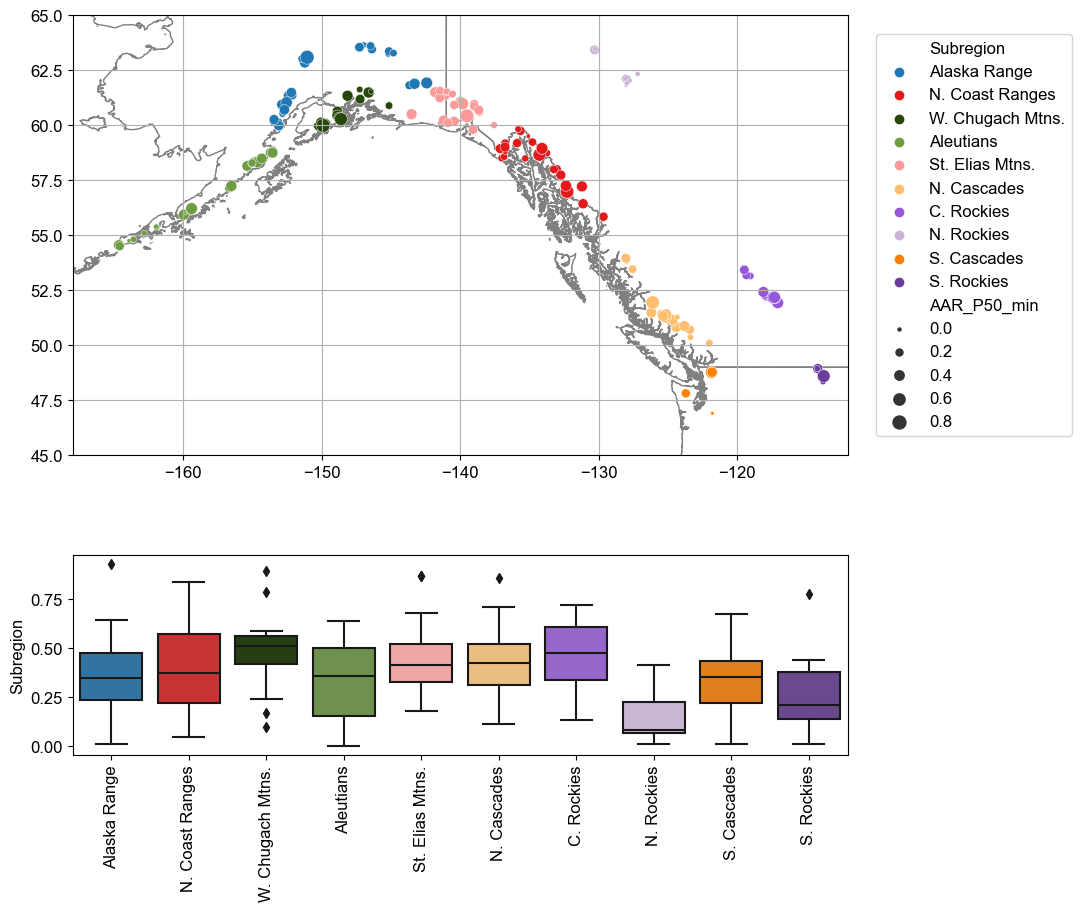

figure saved to file:  /Users/raineyaberle/Research/PhD/snow_cover_mapping/snow-cover-mapping-application/figures/minimum_AARs_map_Subregion.png


/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/seaborn/_oldc

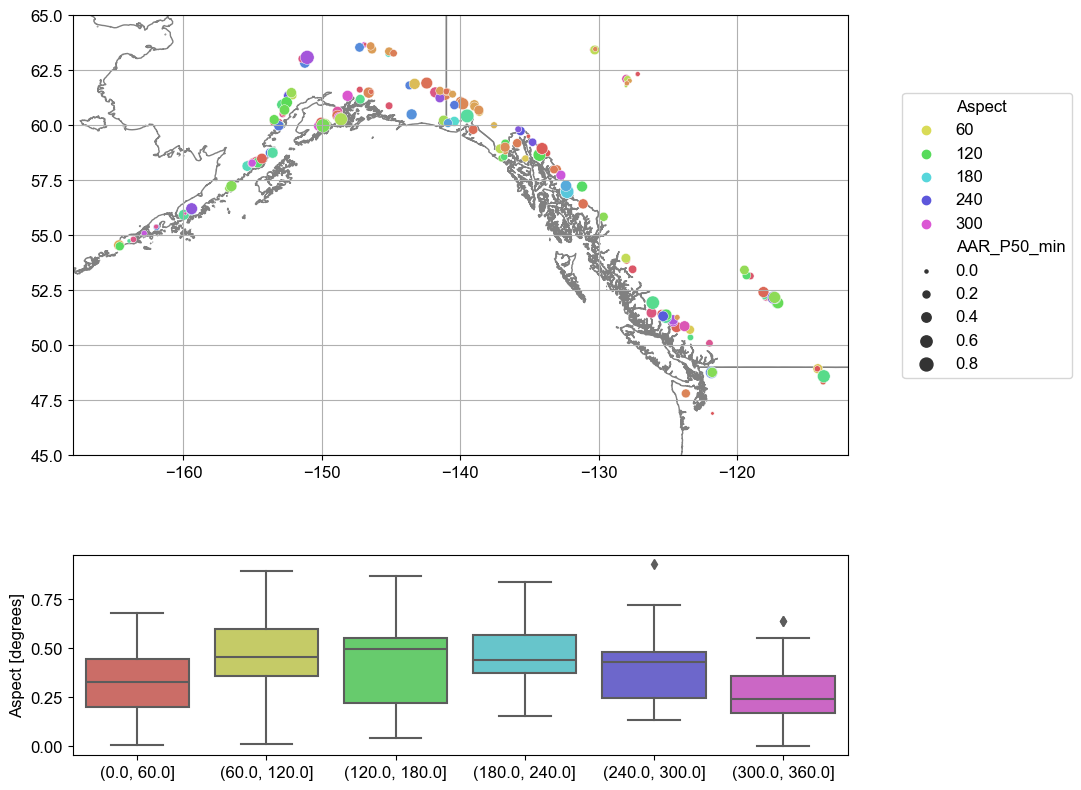

figure saved to file:  /Users/raineyaberle/Research/PhD/snow_cover_mapping/snow-cover-mapping-application/figures/minimum_AARs_map_Aspect.png


/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/seaborn/_oldc

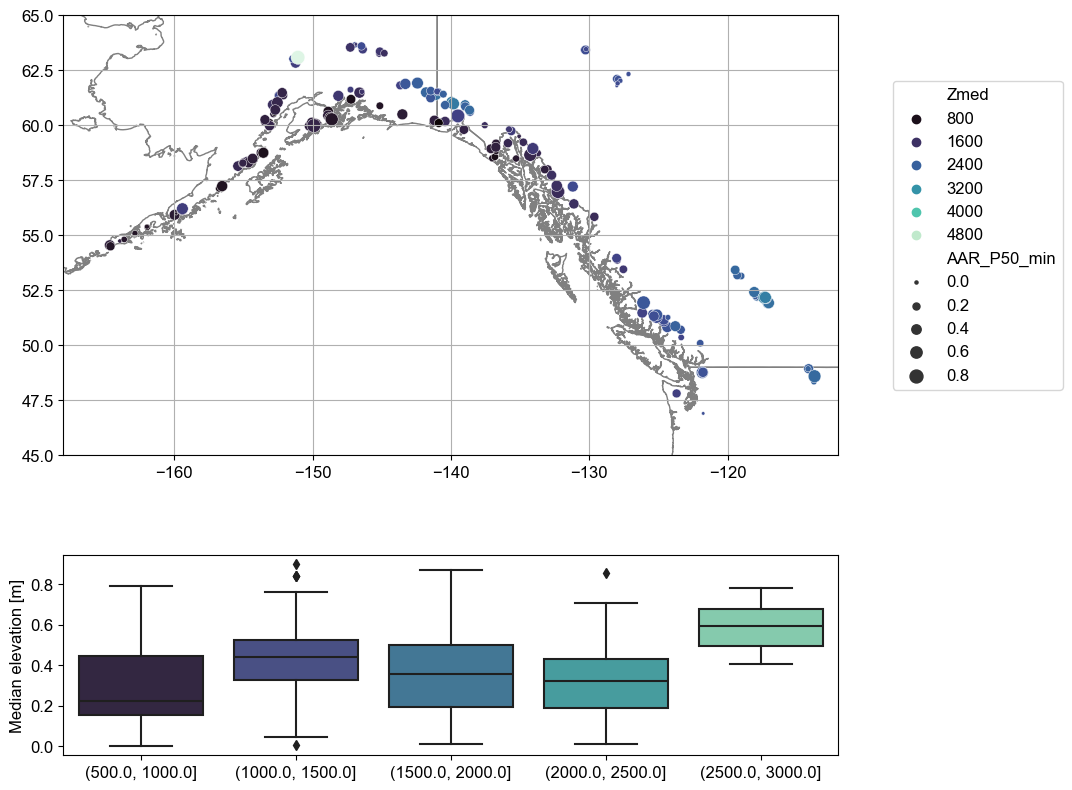

figure saved to file:  /Users/raineyaberle/Research/PhD/snow_cover_mapping/snow-cover-mapping-application/figures/minimum_AARs_map_Zmed.png


/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/seaborn/_oldc

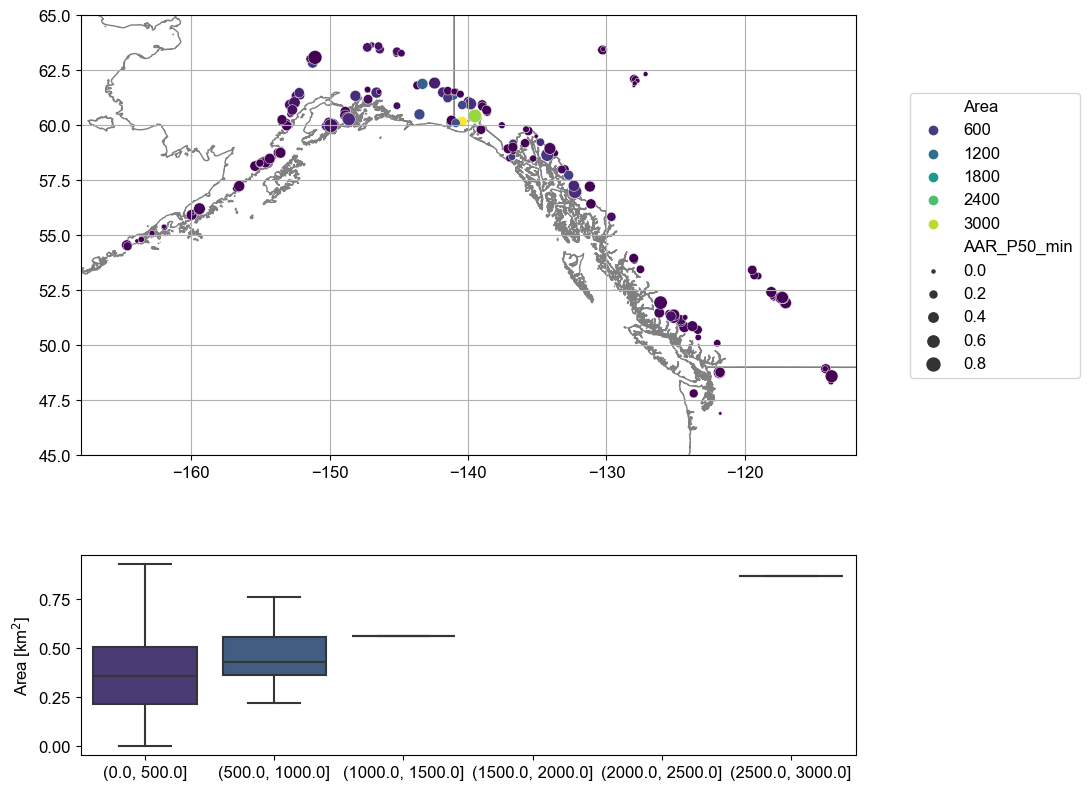

figure saved to file:  /Users/raineyaberle/Research/PhD/snow_cover_mapping/snow-cover-mapping-application/figures/minimum_AARs_map_Area.png


/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/seaborn/_oldc

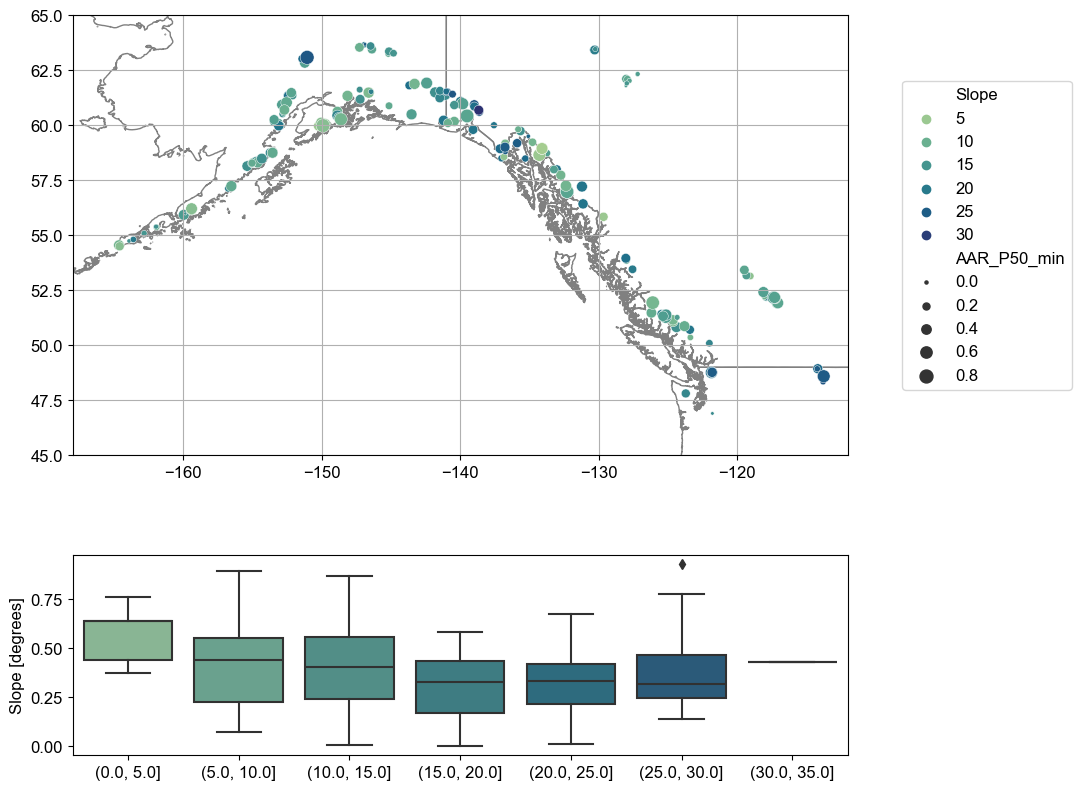

figure saved to file:  /Users/raineyaberle/Research/PhD/snow_cover_mapping/snow-cover-mapping-application/figures/minimum_AARs_map_Slope.png


In [216]:
# -----Plot maps of minimum AARs by various columns
columns = ['Subregion', 'Aspect', 'Zmed', 'Area', 'Slope']
columns_display = ['Subregion', 'Aspect [degrees]', 'Median elevation [m]', 'Area [km$^2$]', 'Slope [degrees]']
palettes = [dict(min_snow_cover_stats[['Subregion', 'color']].drop_duplicates().values),
            'hls', 
            'mako', 
            'viridis', 
            'crest']
bins_list = ['N/A', 
             np.linspace(0,360, num=7), 
             np.linspace(500, 3000, num=6),
             np.linspace(0, 3000, num=7),
             np.linspace(0, 35, num=8)]
plt.rcParams.update({'font.sans-serif':'Arial', 'font.size':12})
xmin, xmax = -168, -112
ymin, ymax = 45, 65
for column, column_display, palette, bins in zip(columns, columns_display, palettes, bins_list):
    fig, ax = plt.subplots(2, 1, figsize=(10,10), gridspec_kw={'height_ratios':[2.5, 1]})
    # plot country outlines on the map
    usca.plot(ax=ax[0], facecolor='None', edgecolor='grey')
    # plot points on the map
    sns.scatterplot(data=min_snow_cover_stats, x='centroid_x', y='centroid_y', 
                    hue=column, palette=palette, size='AAR_P50_min', sizes=(5, 100), legend=True, ax=ax[0])
    sns.move_legend(ax[0], "center right", bbox_to_anchor=[1.1, 0.4, 0.2, 0.2])
    ax[0].set_xlabel('')
    ax[0].set_ylabel('')
    ax[0].grid()
    ax[0].set_xlim(xmin, xmax)
    ax[0].set_ylim(ymin, ymax)
    # plot regional barplots
    if type(bins) != str:
        # add bin column
        min_snow_cover_stats[column + '_bin'] = pd.cut(min_snow_cover_stats[column], bins)
        # plot boxplots
        sns.boxplot(data=min_snow_cover_stats, x=column + '_bin', y='AAR_P50_min', palette=palette, ax=ax[1])
    else:
        # plot boxplots
        sns.boxplot(data=min_snow_cover_stats, x=column, y='AAR_P50_min', palette=palette, ax=ax[1])
    if type(bins) == str:
        ax[1].set_xticks(ax[1].get_xticks())
        ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
    ax[1].set_xlabel('')
    ax[1].set_ylabel(column_display)
    
    plt.show()

    # Save figure
    fig_fn = 'minimum_AARs_map_' + column + '.png'
    fig.savefig(os.path.join(figures_out_path, fig_fn), dpi=250, bbox_inches='tight')
    print('figure saved to file: ', os.path.join(figures_out_path, fig_fn))